# Hotel Booking Analysis 
Contribution - Team
* Team Member 1 - Swapnil Sangvikar
* Team Member 2 - Anirudha kokate

In [15]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)

# Pre-defining the color schema
sns.set_palette('gist_ncar')

In [16]:
# loading csv File path

df = pd.read_csv("C:/Users/ASUS/Downloads/Hotel Bookings.csv")

In [17]:
#first five elements from the dataset using pandas
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
#last five elements from the dataset
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Understanding Columns.

From inital data exploration we see that the dataset consists of both numerical and categorical values. There are even some datetime values stored in the form of object category, which we need to change into proper format. Also there are some categorical variables stored in the form of numerical variables. The other thing that we see is that there are some missing values. We will explore the data further and treat the columns with missing values appropriately.

## Lets understand what are the columns:-

1. #### ADR(Numeric):
* Average Daily Rate defined as - Calculated by dividing the sum of all lodging transactions by the total number of staying nights.
2. #### Adults(Integer):
* Number of adults
3. #### Agent(Categorical):
* ID of the travel agency that made the bookings.
4. #### ArrivalDateDayOfMonth(Integer):
* Day of the month of the arrival date.
5. #### ArrivalDateMonth(Categorical):
* Month of arrival date with 12 categories (January to December).
6. #### ArrivalDateWeekNumber(Integer):
* Week number of the arrival date.
7. #### ArrivalDateYear(Integer): 
* Year of arrival date.
8. #### AssignedRoomType (Categorical): 
* Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
9. #### babies (Integer) :Number of babies.
10. #### BookingChanges (Integer): 
* Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date,nights, reserved room type or meal.
11. #### Children (Integer): 
* Number of children. Sum of both payable and non-payable children.
12. #### Company(Categorical):
* ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
13. #### Country(Categorical):
* Country of origin.
14. #### CustomerType(Categorical):
* Type of booking, assuming one of four categories:-
Contract - when the booking has an allotment or other type of contract associated to it.
Group – when the booking is associated to a group
Transient – when the booking is not part of a group or contract, and is not associated to other transient booking.
Transient-party – when the booking is transient, but is associated to at least other transient booking.
15. #### DaysInWaitingList(Integer):
* Number of days the booking was in the waiting list before it was confirmed to the customer. Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS.
16. #### DepositType(Categorical):
* Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:-
No Deposit – no deposit was made.
Non Refund – a deposit was made in the value of the total stay cost.
Refundable – a deposit was made with a value under the total cost of stay.
17. #### DistributionChannel(Categorical): 
* Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
18. #### IsCanceled(Categorical):
* Value indicating if the booking was canceled (1) or not (0).
19. #### IsRepeatedGuest(Categorical):
* Value indicating if the booking name was from a repeated guest (1) or not (0).
20. #### LeadTime(Integer): 
* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. Subtraction of the entering date from the arrival date.
21. #### MarketSegment(Categorical):
* Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
22. #### Meal(Categorical): 
* Type of meal booked. Categories are presented in standard hospitality meal packages.
Undefined/SC – no meal package.
BB – Bed & Breakfast.
HB – Half board (breakfast and one other meal – usually dinner).
FB – Full board (breakfast, lunch and dinner)
23. #### PreviousBookingsNotCanceled(Integer):
* Number of previous bookings not cancelled by the customer prior to the current booking.
24. #### PreviousCancellations(Integer): 
* Number of previous bookings that were cancelled by the customer prior to the current booking.
25. #### RequiredCardParkingSpaces(Integer): 
* Number of car parking spaces required by the customer.
26. #### ReservationStatus(Categorical):
* Reservation last status, assuming one of three categories:
Canceled – booking was canceled by the customer.
Check-Out – customer has checked in but already departed.
No-Show – customer did not check-in and did inform the hotel of the reason why.
27. #### ReservationStatusDate(Date):
* Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
28. #### ReservedRoomType(Categorical):
* Code of room type reserved. Code is presented instead of designation for anonymity reasons.
29. #### StaysInWeekendNights(Integer):
* Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. Calculated by counting the number of weekend nights from the total number of nights.
30. #### StaysInWeekNights(Integer):
* Number of week nights (Monday to Friday the guest stayed or booked to stay at the hotel. Calculated by counting the number of week nights from the total number of nights.
31. #### TotalOfSpecialRequests(Integer):
* Number of special requests made by the customer (e.g. twin bed or high floor). Sum of all special requests.


   The information about the columns of the dataset was found from the following link: [Hotel Dataset Columns Information](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0040)

In [12]:
#checking which colloums are present
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [13]:
#checking information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Deduction:
  1. Here we can say that there are 119390 entries in columns
  2. Some columns have null values 
  3. There are some unique values present in our columns

In [17]:
# In our dataset there are lots of unique values in lots of columns 
# Getting the number of unique values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 unique value

unique_count_dict = {column: len(df[column].unique()) for column in df.columns}

In [19]:
unique_count_dict

{'hotel': 2,
 'is_canceled': 2,
 'lead_time': 479,
 'arrival_date_year': 3,
 'arrival_date_month': 12,
 'arrival_date_week_number': 53,
 'arrival_date_day_of_month': 31,
 'stays_in_weekend_nights': 17,
 'stays_in_week_nights': 35,
 'adults': 14,
 'children': 6,
 'babies': 5,
 'meal': 5,
 'country': 178,
 'market_segment': 8,
 'distribution_channel': 5,
 'is_repeated_guest': 2,
 'previous_cancellations': 15,
 'previous_bookings_not_canceled': 73,
 'reserved_room_type': 10,
 'assigned_room_type': 12,
 'booking_changes': 21,
 'deposit_type': 3,
 'agent': 334,
 'company': 353,
 'days_in_waiting_list': 128,
 'customer_type': 4,
 'adr': 8879,
 'required_car_parking_spaces': 5,
 'total_of_special_requests': 6,
 'reservation_status': 3,
 'reservation_status_date': 926}

In [20]:
# Creating seperate list of columns and count from the keys and values of the unique_count_dict

column_list = list(unique_count_dict.keys())
unique_value_count = list(unique_count_dict.values())

In [22]:
column_list

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [23]:
unique_value_count

[2,
 2,
 479,
 3,
 12,
 53,
 31,
 17,
 35,
 14,
 6,
 5,
 5,
 178,
 8,
 5,
 2,
 15,
 73,
 10,
 12,
 21,
 3,
 334,
 353,
 128,
 4,
 8879,
 5,
 6,
 3,
 926]

In [24]:
# Creating the Dataframe to display the columns and there count of unique values

unique_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_Unique_Values' : unique_value_count})

# Sorting this above unique_count_df in ascending order to get to count of unique values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

unique_count_df.sort_values(by = ['Number_of_Unique_Values']).reset_index(drop = True) 

,Column_name,Number_of_Unique_Values
0,hotel,2
1,is_canceled,2
2,is_repeated_guest,2
3,arrival_date_year,3
4,deposit_type,3
5,reservation_status,3
6,customer_type,4
7,required_car_parking_spaces,5
8,meal,5
9,babies,5


## check how many duplicate values are present in our df

In [25]:
# In our dataset there are lots of duplicated values in lots of columns 
# Getting the number of duplicated values present in these columns

# Using Dictionary Comprehension to get the dictionary of the columns containing more than 1 duplicated value

duplicated_count_dict = {column: len(df[column].duplicated()) for column in df.columns}

In [26]:
duplicated_count_dict

{'hotel': 119390,
 'is_canceled': 119390,
 'lead_time': 119390,
 'arrival_date_year': 119390,
 'arrival_date_month': 119390,
 'arrival_date_week_number': 119390,
 'arrival_date_day_of_month': 119390,
 'stays_in_weekend_nights': 119390,
 'stays_in_week_nights': 119390,
 'adults': 119390,
 'children': 119390,
 'babies': 119390,
 'meal': 119390,
 'country': 119390,
 'market_segment': 119390,
 'distribution_channel': 119390,
 'is_repeated_guest': 119390,
 'previous_cancellations': 119390,
 'previous_bookings_not_canceled': 119390,
 'reserved_room_type': 119390,
 'assigned_room_type': 119390,
 'booking_changes': 119390,
 'deposit_type': 119390,
 'agent': 119390,
 'company': 119390,
 'days_in_waiting_list': 119390,
 'customer_type': 119390,
 'adr': 119390,
 'required_car_parking_spaces': 119390,
 'total_of_special_requests': 119390,
 'reservation_status': 119390,
 'reservation_status_date': 119390}

In [27]:
# Creating seperate list of columns and count from the keys and values of the duplicated_count_dict

column_list = list(duplicated_count_dict.keys())
duplicated_value_count = list(duplicated_count_dict.values())

In [28]:
# Creating the Dataframe to display the columns and there count ofduplicated values

duplicated_count_df = pd.DataFrame({'Column_name' : column_list, 'Number_of_duplicated_Values' : duplicated_value_count})

# Sorting this above duplicated_count_df in ascending order to get to count of duplicated values present in each column
# Also used reset_index to reset the index and drop the previous index as it was shuffled while sorting values

duplicated_count_df.sort_values(by = ['Number_of_duplicated_Values']).reset_index(drop = True) 

,Column_name,Number_of_duplicated_Values
0,hotel,119390
1,total_of_special_requests,119390
2,required_car_parking_spaces,119390
3,adr,119390
4,customer_type,119390
5,days_in_waiting_list,119390
6,company,119390
7,agent,119390
8,deposit_type,119390
9,booking_changes,119390


# Data Cleaning and Removal of duplicate enteries from the Data
* As data cleaning is an important task before we perform any kind of analysis on dataset, we will remove or replace the not necessary data from our dataset so that we can get desired outputs by performing EDA on it.

We have perfrom following cleaning strategy to overcome the data ambiguity:

### 1. Getting missing data
### 2. Handling missing data
### 3. Checking for duplicate data
### 4. Removing duplicate data

#### 1. Getting missing data :
Getting the count of all nan/null values present in the dataset

In [38]:
# Using isnull() from Pandas to get the Null/NaN values in the each column in dataset and 
# sum() is use to get the sum of missing values present in each column in dataset

print(df.isnull().sum())

# Using list comprehension to provide the list of columns containing missing values

missing_value_columns = [features for features in df.columns if df[features].isnull().sum() > 0]

print("\n--------------------------------------------------------------------------------------------\n")

print('List of columns containing missing values:\n',missing_value_columns)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# Inference:
1. Out of Total 119390 rows ,'agent' and ''company' column contains very large amout of Null/NaN values in it i.e. 16340 and 112593 and this much of Null/NaN values will impact our analysis.

2. And also we can see that only 488 in 'country' and 4 in 'children' column contains Null/NaN values and which is very less.

3. So we will drop/delete "agent" and "company" column from the dataset

#### 2.Handling missing data

In [49]:
# Using drop to drop/delete the columns having large amount of missing values
# And 'company' column has the name of the company responsible for hotel booking
# And 'agent' column is containg booking agency id which is also not needed for our analysis now

df.drop(['agent','company'],axis = 1, inplace = True)

* 1.Column "children" and "country" we will just drop the null values as the count is very low.
* 2.And not replacing these values with MEAN or MEDIAN

In [47]:
# dropna will drop the rows from the data containing null/nan/nan values in it providing axis = 0 which denotes rows

df.dropna(axis = 0,inplace = True)

In [50]:
# Again checking the null values in our dataset
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Inference :
* Now we can see that we have successfully removed the Null/NaN values from our dataset

In [52]:
# Again checking the shape of the dataset
df.shape

(118898, 30)

## Adding important columns

In [25]:
#adding total staying days in hotels
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [26]:
#adding total peoplle num as column, i.e. total people num = num of adults + children + babies
df['total_people'] = df['adults']+df['children']+df['babies']

## New section EDA (exploratory data analysis)

In [18]:
num_hotel_df =df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


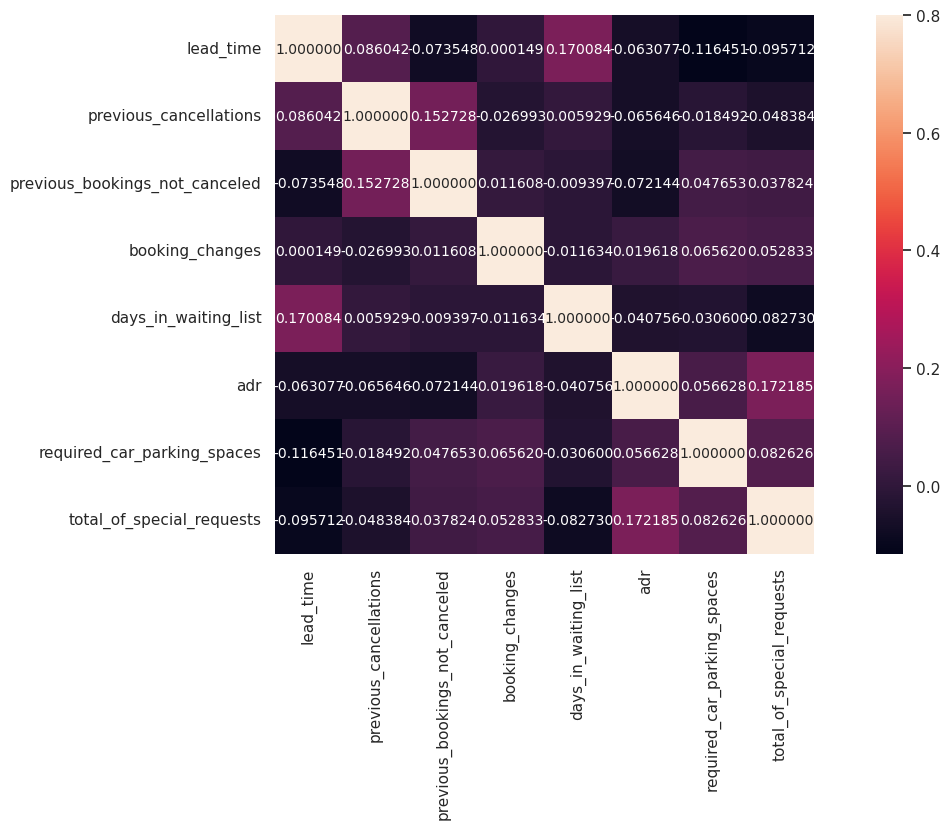

In [19]:
#correlation matirx
corrmat =num_hotel_df.corr()
f, ax = plt.subplots(figsize=(16,7))
sns.heatmap(corrmat,annot = True , fmt='2f',annot_kws={'size':10} ,vmax=.8,square=True);

Total stay length and lead time have slighht correlaton .This means that longer the hotel stayspeople generally plans just before the Actual arrival of the hotel

Adr is slightly correlated with total people ,which shows that as more number of people means more revenue and therefore more Adr

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


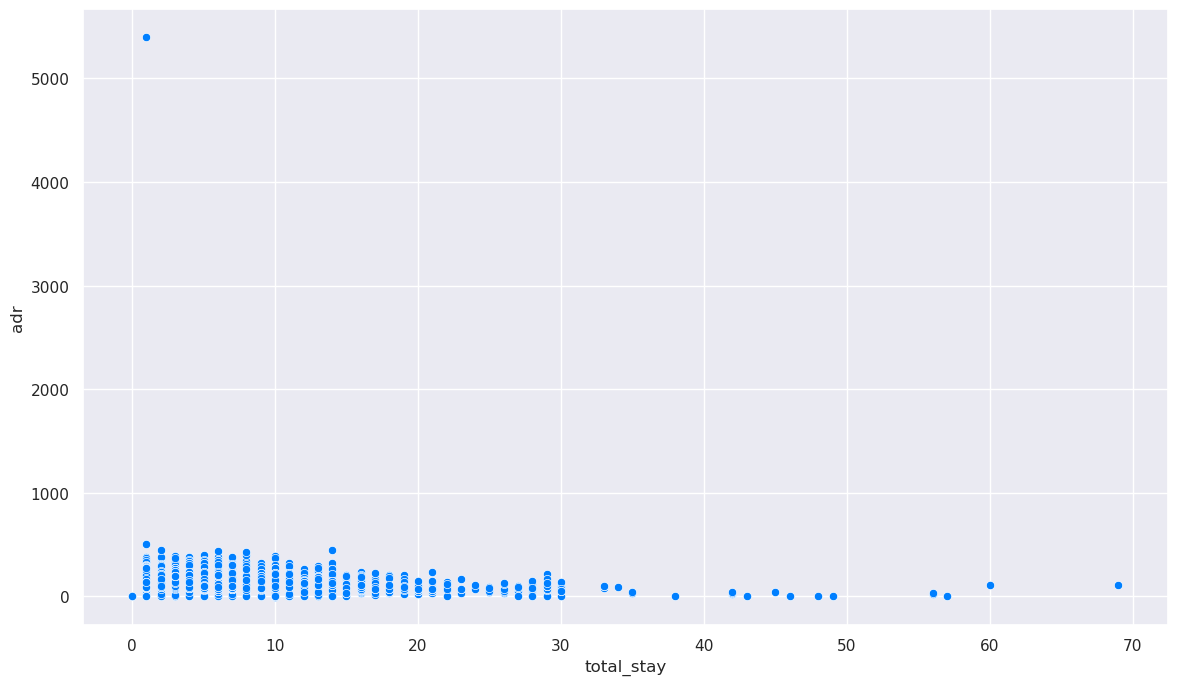

In [27]:
plt.figure(figsize = (14,8))
sns.scatterplot(y = 'adr',x = 'total_stay',data= df)
plt.show()

#### There is an outlier which we will remove it for better scatter plot

In [32]:
df.drop(df[df['adr']>5000].index,inplace = True)

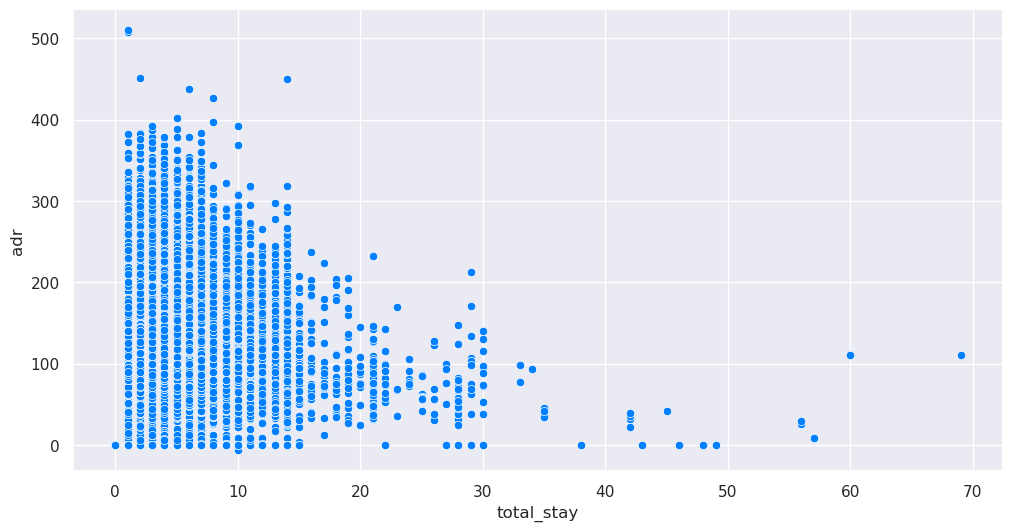

In [33]:
plt.figure(figsize = (12,6))
sns.scatterplot(y= 'adr',x = 'total_stay',data = df)
plt.show()

<AxesSubplot:xlabel='agent', ylabel='num_of_bookings'>

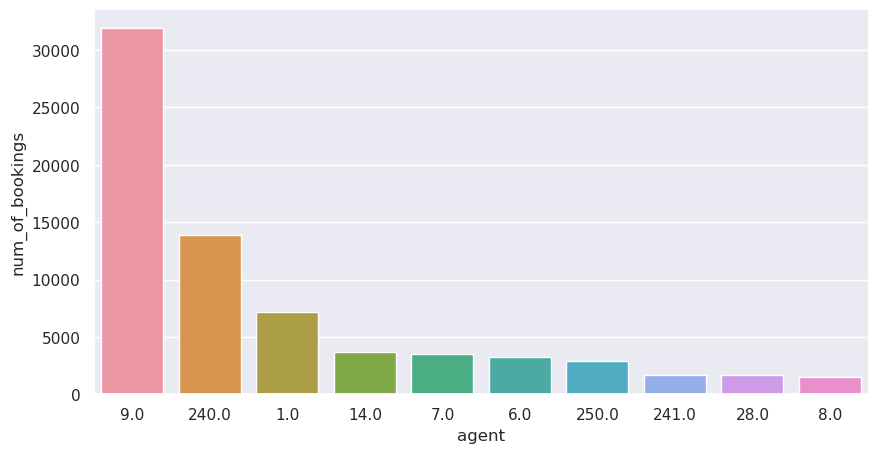

In [34]:
d1 = pd.DataFrame(df['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings',ascending = False)
d1.drop(d1[d1['agent'] ==0 ].index , inplace =True)
# 0 reprsents that booking is not made by an agent
# selecting top 10 performing agents 
d1 = d1[:10]
plt.figure(figsize = (10,5))
sns.barplot(x= 'agent',y = 'num_of_bookings',data = d1 , order = d1.sort_values('num_of_bookings',ascending = False).agent)
                                                                                  

The agent nine has made the highest number of bookings .

Most demanded room type and room type of highest generating adr

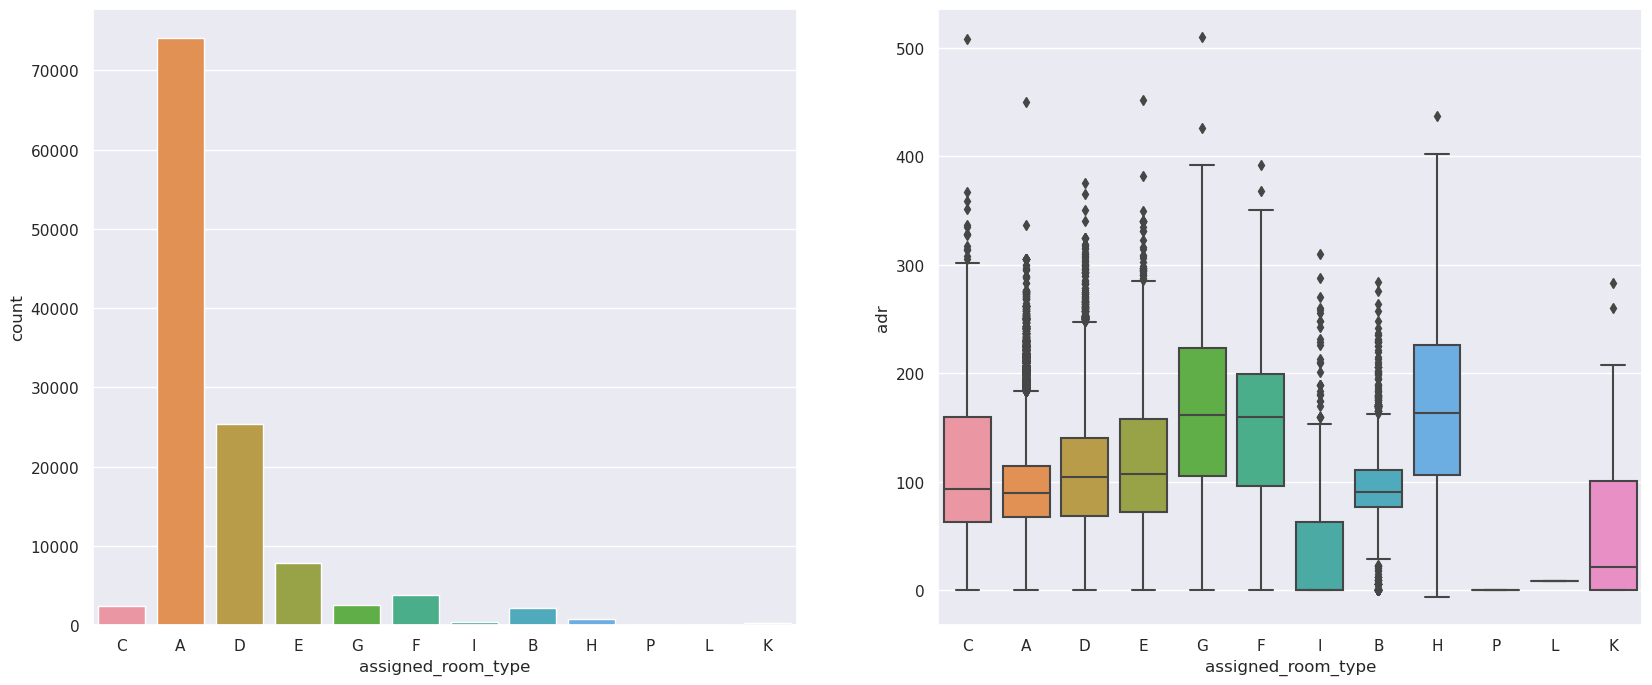

In [36]:
fig , axes = plt.subplots(1,2 ,figsize=(20,8))

grp_by_room = df.groupby('assigned_room_type')
d1['num_of_bookings'] = grp_by_room.size()

sns.countplot(ax= axes[0],x = df['assigned_room_type'])
sns.boxplot(ax = axes [1],x =df['assigned_room_type'],y = df['adr'])
plt.show()

Type Markdown and LaTeX:  𝛼2

Most demanded room type is A but better adr rooms adre H, G, F and C .Hotels should increase the number of room types A and H to maximize the revenue

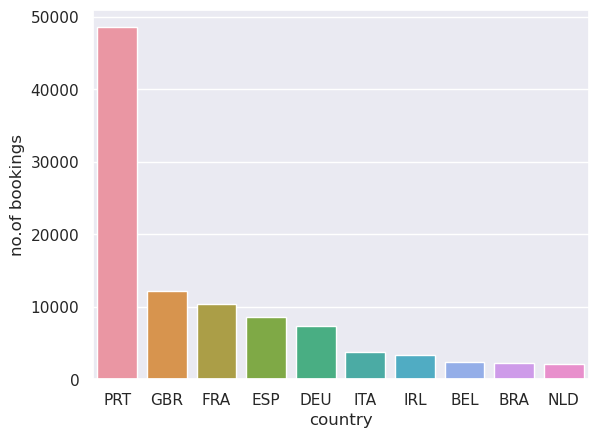

In [38]:
grp_by_country = df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no.of bookings'}).sort_values('no.of bookings',ascending = False)
d2 =d2[:10]
sns.barplot(x = d2.index,y = d2 ['no.of bookings'])
plt.show()

## Most of the customers come from Portugal, Great Britan,France and Spain .

## (1) Distribution channel wise analysis

TA/TO is the most popular distribution channel for booking hotels .aruond 79.13% of the hotel bookings took place through this channel. the GDS channel consists of the fewest hotel bookings of around 0.21%

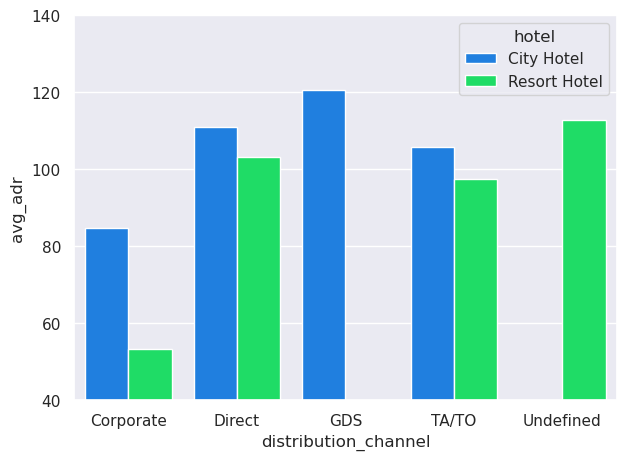

In [42]:
#Distribution channel brining better revenue genarating deals for hotel
group_by_dc_hotel = df.groupby(['distribution_channel','hotel'])
d5 =pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr':'avg_adr'})
plt.figure(figsize =(7,5))
sns.barplot(x=d5['distribution_channel'],y =d5['avg_adr'],hue =d5['hotel'])
plt.ylim(40,140)
plt.show()


In contrast,the majority of the bookings are made through TA/TO. City Hotel can work to expand its reach on GDS channels in order to secure more high-value deals.Direct and TA/TO chann;es generate more revenue for the Resort Hotelneeds to increase outreach on the GDS channel to increase revenue .

#  (2) Hotel wise analysis

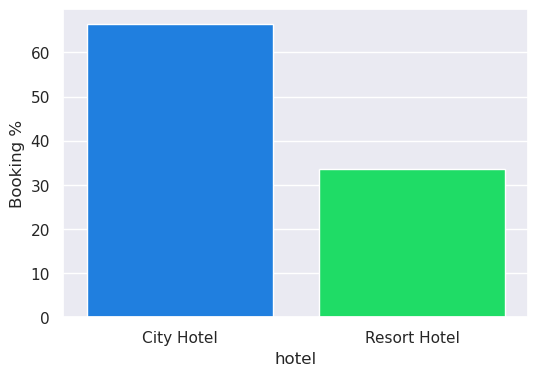

In [45]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns ={0:'Booking %'})   # calculating percentage
plt.figure(figsize = (6,4))
sns.barplot(x =d1['hotel'], y = d1['Booking %'])
plt.show()

It shows that the city hotel bookings are around 60% andd almost 40% for the resort hotel.


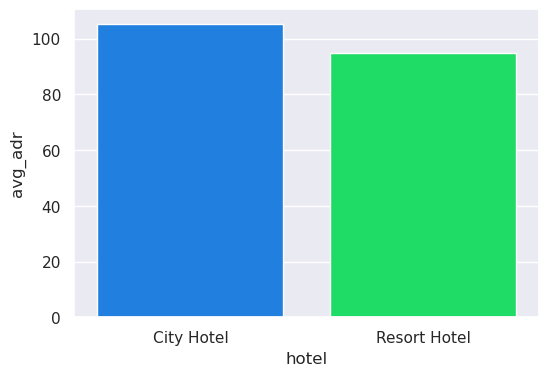

In [47]:
# Which hotel is making more revenue ?
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns ={'adr':'avg_adr'})
plt.figure(figsize =(6,4))
sns.barplot(x = d3['hotel'],y = d3['avg_adr'])
plt.show()

When it comes to the revenue city hotels ara making more revenue more than the resort hotels

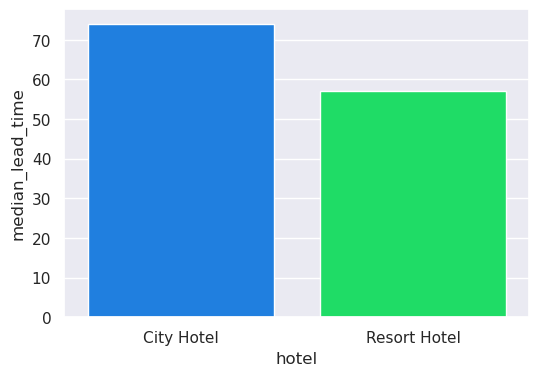

In [48]:
# which hotel has higher lead time ?
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'}) 
plt.figure(figsize =(6,4))
sns.barplot(x= d3['hotel'], y =d2['median_lead_time'])
plt.show()

city hotel has the slightly higher median lead time .Also median lead time is significantly higher in each case , this hsows that customer generally  plans their hotel booking way too early . 

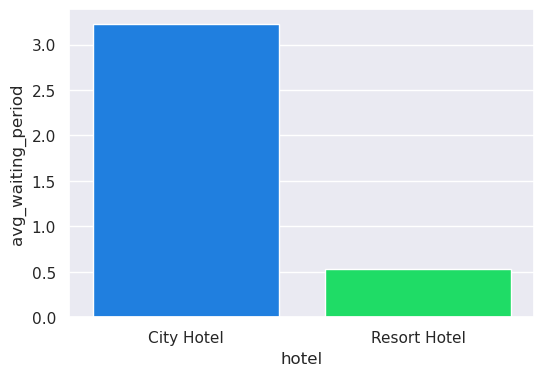

In [49]:
# how long is waitiung time ?
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize =(6,4))
sns.barplot(x= d5['hotel'],y=d5['avg_waiting_period'])
plt.show()

As the wiaitng time is more in city hotel because of the more number of bookings happpening the city hotels compared to the resort hotels 

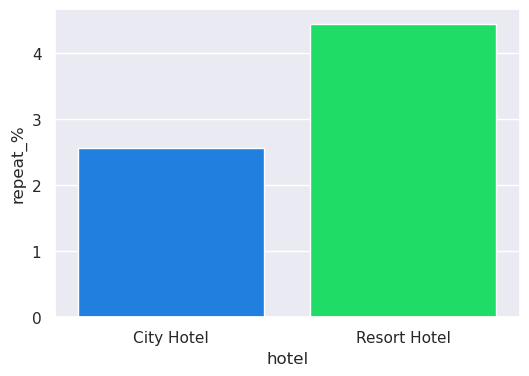

In [52]:
# selecting and counting repeated customers bookings 
repeated_data = df[df['is_repeated_guest']==1]
repeat_grp =repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns ={0:'total_repeated_guests'})
 

#Calculating total bookings 
total_booking = grouped_by_hotel.size()
D2 =pd.DataFrame(total_booking).rename(columns = {0:'total_bookings'})
D3 =pd.concat([D1,D2],axis =1)

#calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (6,4))
sns.barplot(x =D3.index,y = D3['repeat_%'])
plt.show()
  

Resort hotel has slightly higher chances of customers repeat % whne compard to the city hotel

#  (3) Booking cancellation analysis

lets try to unnderstand what is the reason behind cancelling of the hotel bookings .

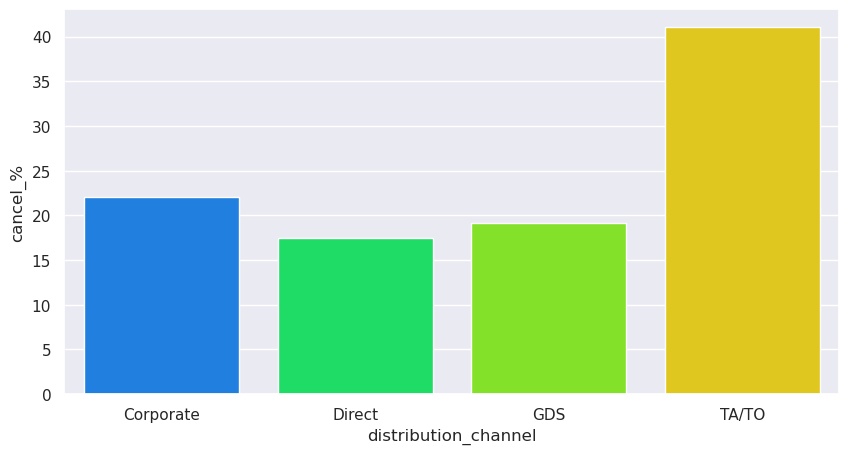

In [61]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index ='Undefined').rename(columns ={0: 'cancel_%'})
plt.figure(figsize =(10,5))
sns.barplot(x = d1.index, y =d1['cancel_%'])
plt.show()

TA/TO has the highest booking cancellation rate . Therefore , a booking via TA/TO is 30% more likely to get cancelled ,or more chances .

Let us see what causes the cancellation of booking of rooms customers . one question thet may arise is whether the longer waiting period or longer lead time causes the cancellation of hotel bookings

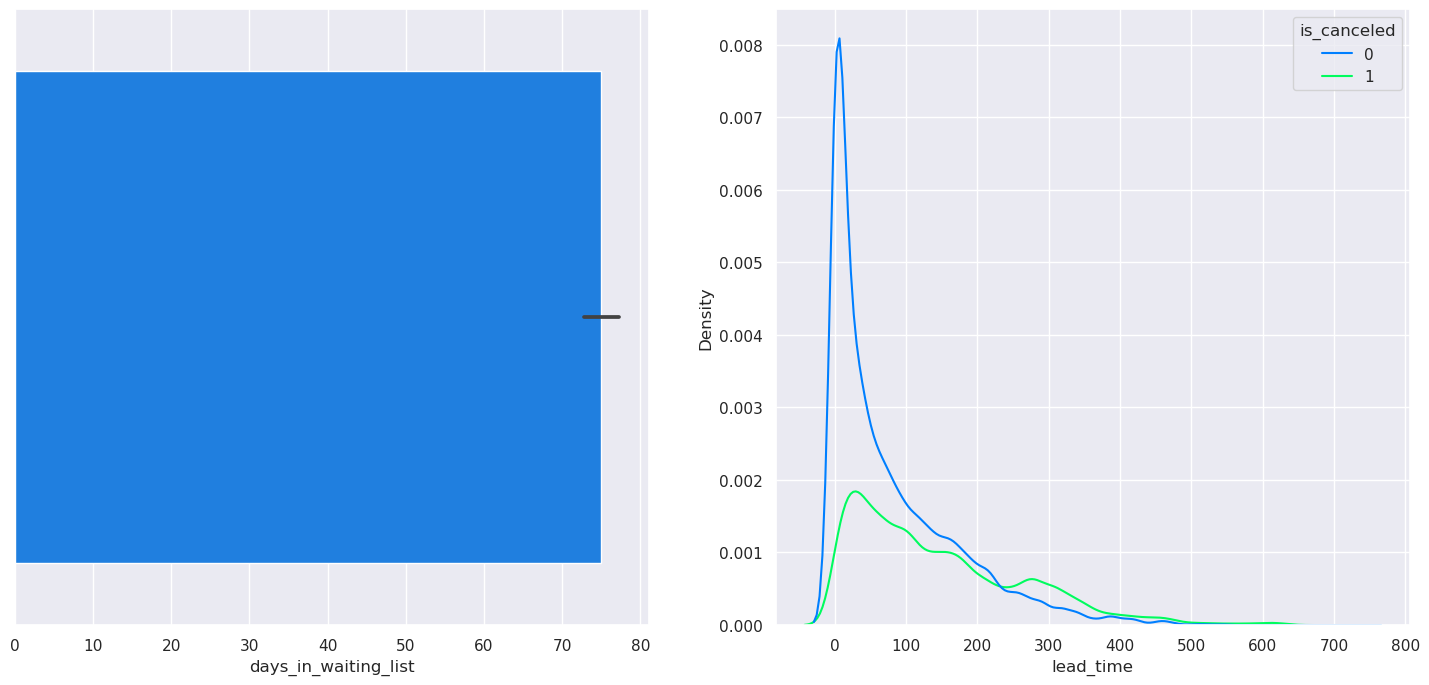

In [64]:
waiting_bookings = df[df['days_in_waiting_list']  != 0] # selecting bookings with non zero waiting time 
fig,axes = plt.subplots(1,2, figsize=(18,8))
sns.barplot(ax=axes[0],x = 'days_in_waiting_list' , hue ='is_canceled', data=waiting_bookings)
sns.kdeplot(ax=axes[1],x =df['lead_time'],hue=df['is_canceled'])
plt.show()

In here by the plot we can observe that most number of bookings that are cancelled have a waiting period of less than 150 days , and most of the bookings that are not cancelled also have a waiting period of less than 150 days .Hence ,this shows that the waiting period has no effect on the cancellation of booking .Also ,lead time has no effect on cancellation of bookings ,as both the curves of cancellation and non-cancellation are similar for lead time too

Now we will check whether not getting alloted the same room type as demanded in the cause of cancellation for hotel booking .

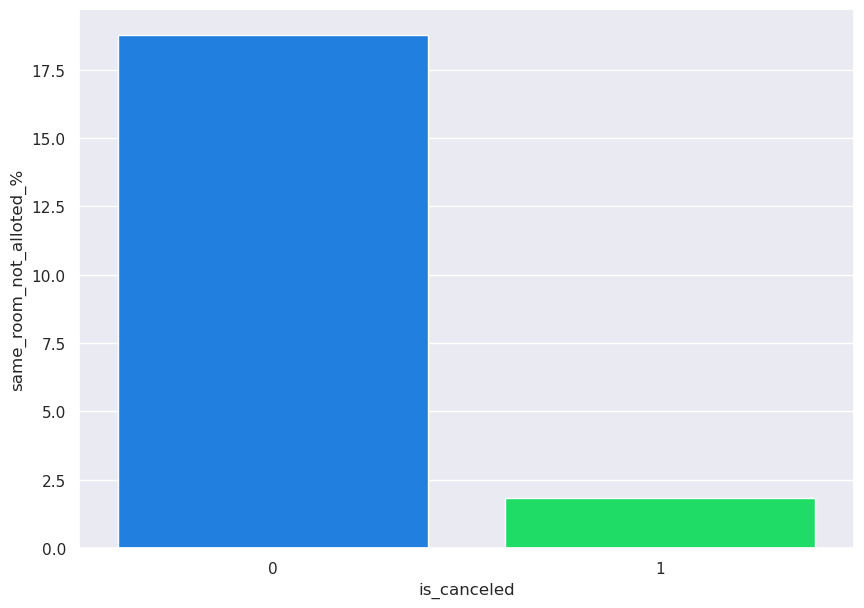

In [65]:
def check_room_allot(x):
   if x['reserved_room_type'] !=x['assigned_room_type']:
      return 1
   else:
      return 0
df['same_room_not_alloted'] =df.apply(lambda x: check_room_allot(x),axis = 1)
grp_by_canc =df.groupby('is_canceled')

D3 =pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y =D3['same_room_not_alloted_%'])
plt.show()

We can  see that not getting the same as demanded is not a case of cancellation of rooms . A significant percentage of bookings are not cancelled even after diffrent rooms as demanded .

Lets see if not getting the same room effects the adr or not .

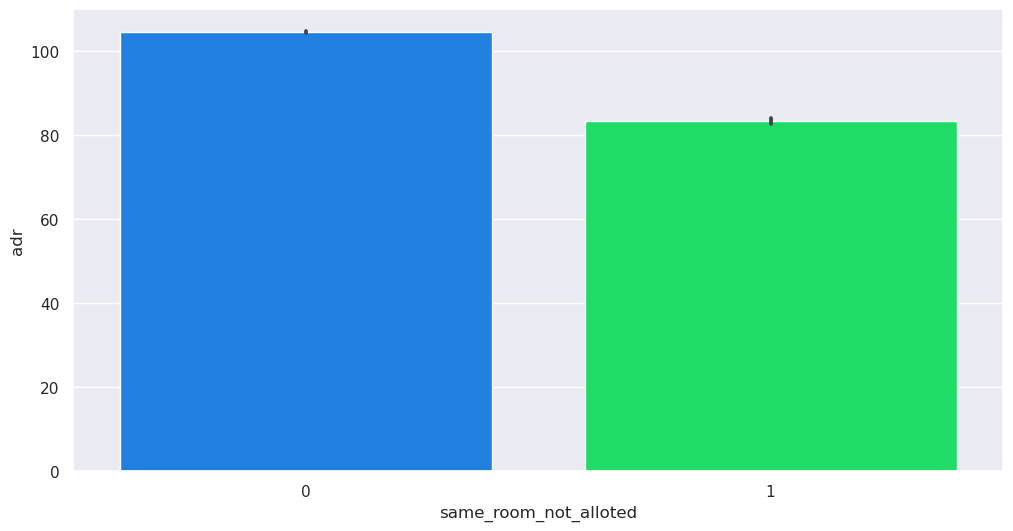

In [66]:
plt.figure(figsize =(12,6))
sns.barplot(x ='same_room_not_alloted',y ='adr',data = df)
plt.show()

We can observe that not getting the same room do effects the adr. People who didn't get the same room have paid a little lower adr ,except few exceptions .

# (4) Time wise analysis 

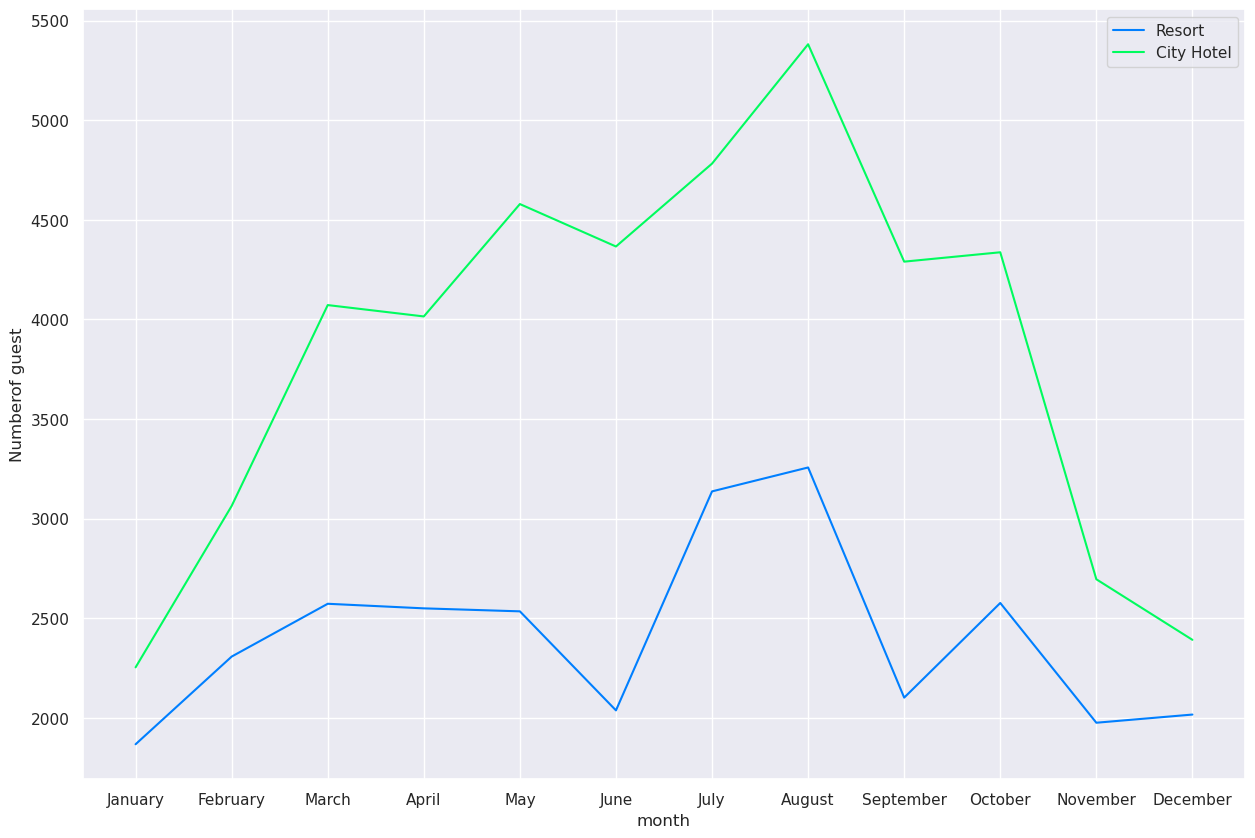

In [67]:
#which are the most busy  months ?
d_month = df['arrival_date_month'].value_counts().reset_index()
d_month.columns=['months','Number of guests'] 
d_month
months =['January','February','March','April','May','June','July','August','September','October','November','December']
d_month['months']= pd.Categorical(d_month['months'],categories = months , ordered =True)
d_month.sort_values('months').reset_index()

data_resort = df[(df['hotel'] =='Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] =='City Hotel')& (df['is_canceled']== 0 )]
resort_hotel =data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_hotel = resort_hotel.merge(city_hotel ,on = 'arrival_date_month')
final_hotel.columns =['month','price_for_resort','price_for_city_hotel']
final_hotel 
 
resort_guest =data_resort['arrival_date_month'].value_counts().reset_index()
resort_guest.columns=['month','no of guests']
resort_guest

city_guest =data_city['arrival_date_month'].value_counts().reset_index()
city_guest.columns=['month','no of guests']
city_guest

final_guest=resort_guest.merge(city_guest,on= 'month')
final_guest.columns=['month','no of guest in resort ','no of guest in city hotel']
final_guest
months=['January','February','March','April','May','June','July','August','September','October','November','December']
final_guest['month']=pd.Categorical(final_guest['month'],categories=months,ordered =True)
final_guest = final_guest.sort_values('month').reset_index()

#Which monthget the most numbers vistors?
sns.lineplot(data=final_guest, x='month',y='no of guest in resort ')
sns.lineplot(data=final_guest, x='month',y='no of guest in city hotel')
plt.legend(['Resort','City Hotel'])
plt.ylabel('Numberof guest')
fig =plt.gcf()
fig.set_size_inches(15,10)


By this we can observe that more number of customers visit in thew month of August

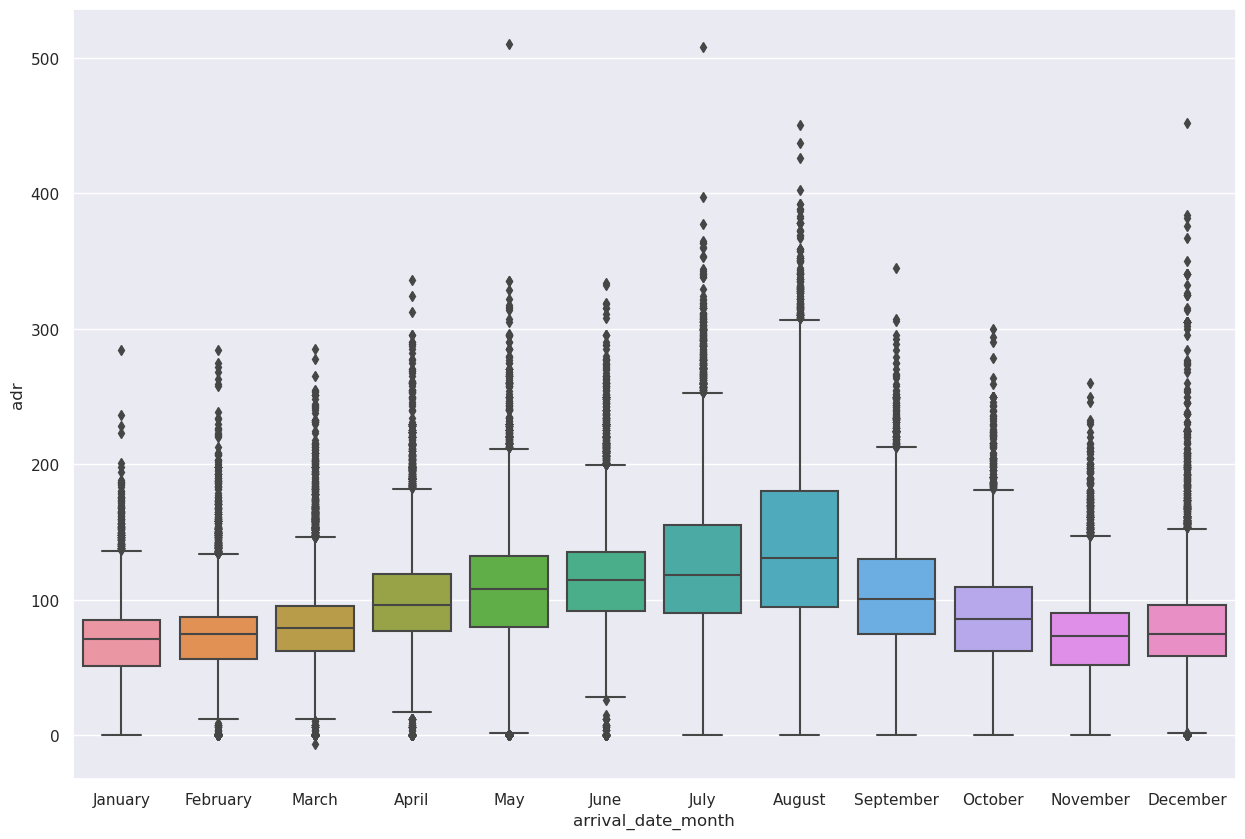

In [68]:
reindex= ['January','February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month']=pd.Categorical(df['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize=(15,10))
sns.boxplot(x=df['arrival_date_month'],y=df['adr'])
plt.show()

The average annaual rises from the begining fo the year up to the middle of the year , reaches its peak in August,and then lowers to the end of the year .But hotels do make some good deals with high ADR at the end of the year also

# Conclusion

1) when compared to the Resort hotel ,City hotel recieves the most number of bookings 

2) mostly peoplle choose the TA/TO  channel for booking hotel and for cancellation as well

3) By the help of most demand room type and better adr rooms the hotels can increase the number of particular room types and maximize their revenue .

4) Resort hotel have more chances of customer repeating the same hotel on their next visit

5) Resort hotels have more revenue generating deals by direct and TA/TO channel. It needs to incresse its out reach on the GDS channel to increase revenue .

5) Most guest arrive during the month of August in both type of hotels .